In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

#### Read and explore the given dataset

In [ ]:
#Loading data
Electronics_df = pd.read_csv("C:\\Users\\Radhika\\OneDrive\\AIML Program\\Recommendation Systems\\ratings_Electronics.csv", sep=",")

In [ ]:
Electronics_df.columns = ['userId', 'productId', 'ratings', 'timestamp']

In [5]:
Electronics_df.head()

,userId,productId,ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [6]:
Electronics_df.shape

(7824481, 4)

### Keep the users only who has given 50 or more number of ratings 

In [7]:
# Number of ratings per user
Users_reducedto50_df=Electronics_df.groupby(['userId']).filter(lambda s: s.ratings.count()>=50)

In [8]:
Users_reducedto50_df.shape

(125871, 4)

In [164]:
Users_reducedto50_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125871 entries, 0 to 125870
Data columns (total 5 columns):
Unnamed: 0    125871 non-null int64
userId        125871 non-null object
productId     125871 non-null object
ratings       125871 non-null float64
timestamp     125871 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [10]:
Users_reducedto50_df.to_csv('reduced50.csv')

In [4]:
#Loading data
Users_reducedto50_df = pd.read_csv("reduced50.csv", sep=",")
Users_reducedto50_df=Users_reducedto50_df.sample(1000)

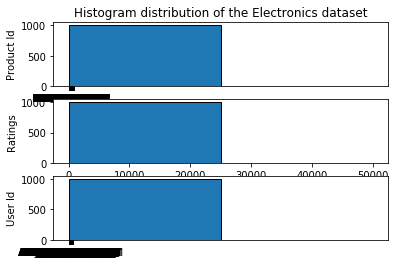

In [9]:
plt.subplot(3, 1, 1) # subplot(211)
plt.title('Histogram distribution of the Electronics dataset')
plt.hist(Users_reducedto50_df.productId, 2, range=(0, 50000), edgecolor='black')
plt.ylabel('Product Id')
plt.subplot(3, 1, 2)
plt.hist(Users_reducedto50_df.ratings, 2, range=(0, 50000), edgecolor='black')
plt.ylabel('Ratings')
plt.subplot(3, 1, 3)
plt.hist(Users_reducedto50_df.userId, 2, range=(0, 50000), edgecolor='black')
plt.ylabel('User Id')
plt.show()

In [10]:
Users_reducedto50_df['ratings'].unique()

array([5., 4., 1., 3., 2.])

In [11]:
Users_reducedto50_df['productId'].unique()

array(['B0080FFZ8E', 'B0007WK8LC', 'B0088CJT4U', 'B0076E9CL6',
       'B000P8X8R4', 'B00A7FS3AW', 'B0000300QN', 'B006NNWZSI',
       'B009661Y8G', 'B004UHYYAG', 'B004VMM718', 'B000VI363Y',
       'B0009JB7GI', 'B00CELZD8C', 'B004HO58SO', 'B00EB7UIO6',
       'B002OEBILK', 'B006K7P71E', 'B001U02JZ8', 'B008M0NDRM',
       'B00169N0BK', 'B00IX2VGFA', 'B005C95NCY', 'B0011ULQNI',
       'B0000BZL5A', 'B00BXA7N6A', 'B00005LE75', 'B001TOD7N8',
       'B001D1USV6', 'B002V88HFE', 'B00CKI8Z0M', 'B0034CL2ZI',
       'B0000AUR23', 'B00A3YDT5Q', 'B0049MGC2U', 'B006V72AHC',
       'B004MC3ON2', 'B00004TDWY', 'B008T17W9O', 'B006ZP8UOW',
       'B008V9959O', 'B00E98O7GC', 'B00176NKPS', 'B0032JRRWU',
       'B000V1O1J4', 'B0098QV13W', 'B007BWTOHU', 'B001HMVAWC',
       'B005EVGS2E', 'B00DTZYHX4', 'B00004XP73', 'B0043EV20Q',
       'B001EDVO3E', 'B0054CFKQI', 'B0002XZQ9U', 'B006SVV6HG',
       'B001KELVS0', 'B00009EIZ7', 'B00JCTXO3K', 'B003LVZO8I',
       'B007Y008R4', 'B000KU5CN0', 'B0009WNA0Q', 'B0002

In [12]:
from sklearn.model_selection import train_test_split

trainDF, tempDF = train_test_split(Users_reducedto50_df, test_size = 0.2, random_state = 100)
testDF = tempDF.copy()
tempDF.rating = np.nan
testDF = testDF.dropna()
ratings = pd.concat([trainDF, tempDF]).reset_index()
ratings.drop('index',axis=1,inplace=True)
ratings.drop('Unnamed: 0',axis=1,inplace=True)

In [13]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
userId       1000 non-null object
productId    1000 non-null object
ratings      1000 non-null float64
timestamp    1000 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


### Popularity based recommendation 

In [14]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():    
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.rating = None
        self.popularity_recommendations = None               
    #Create the popularity based recommender system model    
    def create(self, train_data, user_id, item_id, rating): 
        self.train_data = train_data
        self.user_id = user_id        
        self.item_id = item_id  
        self.rating = rating 
        
        #Get a count of user_ids for each unique song as   recommendation score
        #train_data_grouped = train_data.groupby([item_id]).agg({[user_id]: ['count']}).reset_index()
        train_data_grouped = pd.DataFrame(ratings.groupby([item_id,user_id]).agg({rating:{'score': 'mean'}}).reset_index())
        train_data_grouped.columns = train_data_grouped.columns.droplevel(0)
        train_data_grouped.columns = [item_id,user_id,'score']
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])            
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)     
        #Use the popularity based recommender system model to    
        #make recommendations    
    def recommend(self, user_id):            
        user_recommendations = self.popularity_recommendations                 
        #Add user_id column for which the recommendations are being generated        
        user_recommendations['user_id'] = user_id            
        #Bring user_id column to the front        
        cols = user_recommendations.columns.tolist()        
        cols = cols[-1:] + cols[:-1]        
        user_recommendations = user_recommendations[cols]
        return user_recommendations

In [15]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
userId       1000 non-null object
productId    1000 non-null object
ratings      1000 non-null float64
timestamp    1000 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB


In [16]:
pm = popularity_recommender_py()
pm.create(trainDF, 'userId', 'productId','ratings')
#user the popularity model to make some prediction
users=testDF['userId'].unique()
user_id = users[5]
print("Training data products for the user userid: %s:" % user_id)
df1=pm.recommend(user_id)

Training data products for the user userid: A1ODOGXEYECQQ8:


C:\Users\Radhika\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [17]:
print("Recomendation for user",user_id,"are as below:")
print("")
print(df1)

Recomendation for user A1ODOGXEYECQQ8 are as below:

           user_id   productId          userId  score  Rank
0   A1ODOGXEYECQQ8  B00000JDGO  A1F9Z42CFF9IAY    5.0   1.0
1   A1ODOGXEYECQQ8  B0000300QN  A2YRX8J4WM5BRX    5.0   2.0
2   A1ODOGXEYECQQ8  B00003CWDG   ASJSX783R5HTZ    5.0   3.0
4   A1ODOGXEYECQQ8  B00004RG8J  A1LA4K5JF78BER    5.0   4.0
6   A1ODOGXEYECQQ8  B00004TDWY   ALUNVOQRXOZIA    5.0   5.0
7   A1ODOGXEYECQQ8  B00004TLNG   AUUV3XDYB16X5    5.0   6.0
10  A1ODOGXEYECQQ8  B00005LE75   AKT8TGIT6VVZ5    5.0   7.0
11  A1ODOGXEYECQQ8  B00005RKSS  A16RL0RMRF974O    5.0   8.0
12  A1ODOGXEYECQQ8  B00005T3G0  A15TABNGK6L4N3    5.0   9.0
16  A1ODOGXEYECQQ8  B000060K55  A2AEZQ3DGBBLPR    5.0  10.0


### Collaborative filtering based recommendation

In [18]:
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.product_dict = None
        self.rev_product_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (product) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (product)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (product) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_product, all_product):
            
        ####################################
        #Get users for all product in user_product.
        ####################################
        user_product_users = []        
        for i in range(0, len(user_product)):
            user_product_users.append(self.get_item_users(user_product[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_product) X len(product)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_product), len(all_product))), float)
           
        #############################################################
        #Calculate similarity between user product and all unique product
        #in the training data
        #############################################################
        for i in range(0,len(all_product)):
            #Calculate unique listeners (users) of product (item) i
            product_i_data = self.train_data[self.train_data[self.item_id] == all_product[i]]
            users_i = set(product_i_data[self.user_id].unique())
            
            for j in range(0,len(user_product)):       
                    
                #Get unique listeners (users) of product (item) j
                users_j = user_product_users[j]
                    
                #Calculate intersection of listeners of product i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of product i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_product, user_product):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user product.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['user_id', 'product', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_product[sort_index[i][1]] not in user_product and rank <= 10:
                df.loc[len(df)]=[user,all_product[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no product for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique product for this user
        ########################################
        user_product = self.get_user_items(user)    
            
        print("No. of unique product for the user: %d" % len(user_product))
        
        ######################################################
        #B. Get all unique items (product) in the training data
        ######################################################
        all_product = self.get_all_items_train_data()
        
        print("no. of unique product in the training set: %d" % len(all_product))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_product) X len(product)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_product, all_product)
        
        print(cooccurence_matrix)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_product, user_product)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_product = item_list
        
        ######################################################
        #B. Get all unique items (product) in the training data
        ######################################################
        all_product = self.get_all_items_train_data()
        
        print("no. of unique product in the training set: %d" % len(all_product))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_product) X len(product)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_product, all_product)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_product, user_product)
         
        return df_recommendations

In [19]:
is_model = item_similarity_recommender_py()
is_model.create(trainDF, 'userId', 'productId')

In [20]:
#Print the songs for the user in training data
user_id = users[5]
user_items = is_model.get_user_items(user_id)
#
print("------------------------------------------------------------------------------------")
print("Training data product for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

print("----------------------------------------------------------------------")
print("Recommendation process going on:")
print("----------------------------------------------------------------------")

#Recommend songs for the user using personalized model
df=is_model.recommend(user_id)

------------------------------------------------------------------------------------
Training data product for the user userid: A1ODOGXEYECQQ8:
------------------------------------------------------------------------------------
B000W6POQW
B002P35JMO
----------------------------------------------------------------------
Recommendation process going on:
----------------------------------------------------------------------
No. of unique product for the user: 2
no. of unique product in the training set: 771
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Non zero values in cooccurence_matrix :4


In [21]:
print("Recomendation for user:",user_id)
print("")
print(df)

Recomendation for user: A1ODOGXEYECQQ8

          user_id     product  score rank
0  A1ODOGXEYECQQ8  B007M52EXM    0.0    1
1  A1ODOGXEYECQQ8  B0093HGD2K    0.0    2
2  A1ODOGXEYECQQ8  B00HPM1FZ0    0.0    3
3  A1ODOGXEYECQQ8  B000HWNGX4    0.0    4
4  A1ODOGXEYECQQ8  B00AF22NTY    0.0    5
5  A1ODOGXEYECQQ8  B003VTZE4Y    0.0    6
6  A1ODOGXEYECQQ8  B00GIAOB10    0.0    7
7  A1ODOGXEYECQQ8  B00JHUEK1Y    0.0    8
8  A1ODOGXEYECQQ8  B009XJZ9VY    0.0    9
9  A1ODOGXEYECQQ8  B0036VO2B8    0.0   10


In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_collab_filt=df1.productId
y_popularity=df['product']

In [24]:
df['y_collab_filt']= le.fit_transform(y_collab_filt)
df['y_popularity']= le.fit_transform(y_popularity)

In [25]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [26]:
rmse_val = rmse(df['y_collab_filt'], df['y_popularity'])

In [27]:
rmse_val

3.924283374069717

### Using combination of algorithm

In [78]:
data = pd.read_csv("reduced50.csv", sep=",")
Users_reducedto50_df=pd.read_csv("reduced50.csv", sep=",")

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125871 entries, 0 to 125870
Data columns (total 5 columns):
Unnamed: 0    125871 non-null int64
userId        125871 non-null object
productId     125871 non-null object
ratings       125871 non-null float64
timestamp     125871 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.8+ MB


In [80]:
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
benchmark = []

In [81]:
reader = Reader(rating_scale=(0, 9))
data = Dataset.load_from_df(Users_reducedto50_df[['userId', 'productId', 'ratings']], reader)

In [82]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [83]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [84]:
surprise_results

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,0.982062,0.410432,0.448073
SVD,0.986132,12.703041,0.761573
SVDpp,0.987616,158.511111,4.613682
KNNBaseline,1.053907,0.606650,1.779646
KNNWithZScore,1.079761,0.375116,1.442504
KNNWithMeans,1.081775,0.207214,1.410861
CoClustering,1.100862,9.054461,0.530361
KNNBasic,1.113125,0.168902,1.282931
SlopeOne,1.145891,108.385653,11.760397


### BaselineOnly algorithm gave us the best rmse, therefore, we will proceed further with BaselineOnly and use Alternating Least Squares (ALS).

In [85]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'fit_time': (0.21987271308898926, 0.25386595726013184, 0.23388099670410156),
 'test_rmse': array([0.97684174, 0.98411163, 0.98096013]),
 'test_time': (0.2848341464996338, 0.34781932830810547, 0.27182722091674805)}

In [86]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 0.9836


0.9835519567791058

In [87]:
trainset = algo.trainset
print(algo.__class__.__name__)

BaselineOnly


In [88]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [89]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,A3CW0ZLUO5X2B1,B002P3KMPI,4.0,4.192014,{'was_impossible': False},167,0,0.192014
1,A335QXPTV1RIV1,B000I68BD4,2.0,3.855724,{'was_impossible': False},44,24,1.855724
2,ASFW4ZMNZJKDA,B007FPIQ0E,5.0,4.338254,{'was_impossible': False},38,19,0.661746
3,A30ADSBTWCORYC,B008J29ZWK,4.0,4.581290,{'was_impossible': False},44,0,0.581290
4,A10NMELR4KX0J6,B00178T5V4,1.0,4.102161,{'was_impossible': False},76,1,3.102161


In [90]:
best_predictions = df.sort_values(by='err')[:5]
worst_predictions = df.sort_values(by='err')[-5:]

In [91]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
27480,A3TNM3C9ENUCFW,B0093GIME8,4.0,3.999979,{'was_impossible': False},49,11,0.000021
30899,A35HOUWHAYZZN6,B00J49ZH56,4.0,3.999934,{'was_impossible': False},40,0,0.000066
7129,ABDR6IJ93HFIO,B0035J7XG2,5.0,4.999848,{'was_impossible': False},153,5,0.000152
5941,A13BX9O5UDBILC,B00BE68UZ6,4.0,3.999784,{'was_impossible': False},54,18,0.000216
26778,A31N0XY2UTB25C,B001PS9E5I,5.0,5.000272,{'was_impossible': False},165,6,0.000272


In [92]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
17961,A1KKE6VX8VPWZK,B000U62N1S,1.0,4.985678,{'was_impossible': False},78,4,3.985678
19023,A3V8P0O224OBDB,B0002L5R78,1.0,4.995074,{'was_impossible': False},54,50,3.995074
21830,AHF4I1FSIHABC,B006TT91TW,1.0,5.046212,{'was_impossible': False},43,22,4.046212
14537,A1H55L0BLPCWYF,B0002L5R78,1.0,5.077679,{'was_impossible': False},39,50,4.077679
22563,A3QDMDSANPYGUX,B001TH7GUU,1.0,5.222936,{'was_impossible': False},39,56,4.222936


In [93]:
Users_reducedto50_df.loc[Users_reducedto50_df['productId'] == 'B001TH7GUU']['ratings'].describe()

count    78.000000
mean      4.871795
std       0.518714
min       1.000000
25%       5.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: ratings, dtype: float64

#### The worst predictions look pretty surprise. Let's look in more details of the last one productId "B001TH7GUU", the item was rated by 78 users, user "A3QDMDSANPYGUX" rated 5, our BaselineOnly algorithm predicts 1.

In [94]:
X=Users_reducedto50_df.loc[Users_reducedto50_df['productId'] == 'B001TH7GUU']['ratings']

In [95]:
X

41140    5.0
41141    5.0
41142    4.0
41143    1.0
41144    5.0
        ... 
41213    5.0
41214    5.0
41215    5.0
41216    5.0
41217    5.0
Name: ratings, Length: 78, dtype: float64

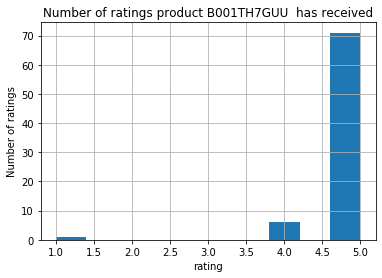

In [97]:
import matplotlib.pyplot as plt
X.hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings product B001TH7GUU  has received')
plt.show()

It turns out, most of the ratings this product received was "5", in another word, most of the users in the data rated this product "0", only very few users rated "1". Same with the other predictions in "worst predictions" list. It seems that for each prediction, the users are some kind of outsiders.